In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,auc
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier


data = load_breast_cancer()
X = data.data
y = data.target
X
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [1]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("GPUs Available:", tf.config.list_physical_devices("GPU"))


TF Version: 2.20.0
GPUs Available: []


In [2]:
import torch

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Number of GPUs
print("Number of GPUs:", torch.cuda.device_count())

# Current GPU name (if available)
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(torch.cuda.current_device()))


CUDA available: False
Number of GPUs: 0


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [14]:

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train,y_train)
lr_y_pred_proba = lr_model.predict_proba(X_test)[:,1]

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:,1]


In [1]:
import torch
print(torch.version.cuda)
print(torch.cuda.is_available())


12.1
True


In [1]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("GPUs Available:", tf.config.list_physical_devices('GPU'))


TF Version: 2.20.0
GPUs Available: []


NameError: name 'python' is not defined

In [17]:
lr_fpr,lr_tpr,thresholds = roc_curve(y_test,lr_y_pred_proba)
lr_roc_auc = auc(lr_fpr,lr_tpr)

rf_fpr,rf_tpr,thresholds = roc_curve(y_test,rf_y_pred_proba)
rf_roc_auc = auc(rf_fpr,rf_tpr)


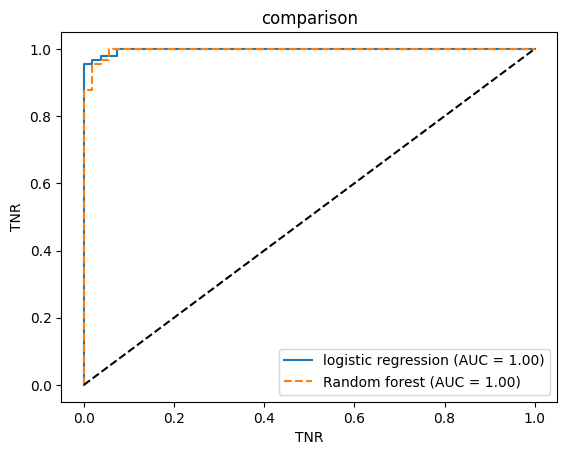

In [19]:
plt.Figure(figsize=(7,6))
plt.plot(lr_fpr,lr_tpr,label = f"logistic regression (AUC = {lr_roc_auc:.2f})")
plt.plot(rf_fpr,rf_tpr,label = f"Random forest (AUC = {rf_roc_auc:.2f})",linestyle = "--")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("TNR")
plt.ylabel("TNR")
plt.title("comparison")
plt.legend()

plt.show()